# Exam R
Mark Klik & Misja Mikkers

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


Contributers: Pieter Verloop, 2013830
              Roy van den Kieboom, 2011084

In [17]:
library(tidyverse)
library(gvlma)

# Assignment 1


## Data

The data are given:


In [19]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

head(df1)

V1,epsilon,response,group
3.588198,-3.3733866,-7.549782,1
8.094746,1.6755741,-11.513918,2
4.680792,0.3067462,-6.054838,1
8.947157,-2.2762739,-17.170587,2
9.464206,2.5076298,-13.420781,2
1.410008,0.8529284,1.032911,1


## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

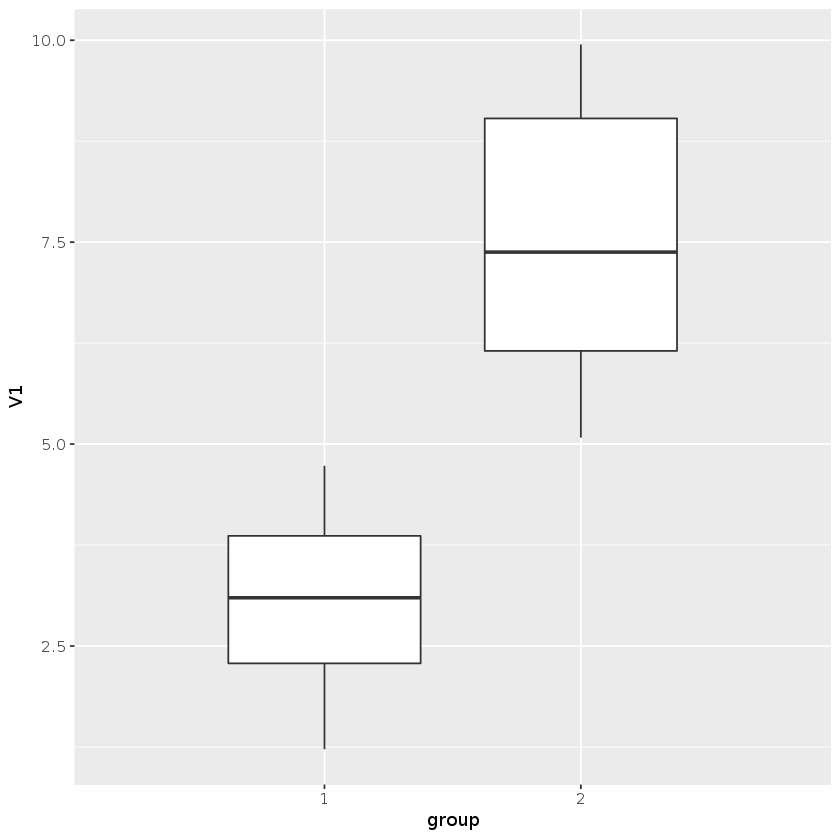

In [66]:
first_plot <-ggplot(data = df1, aes(group=group, x= group, y = V1)) + 
geom_boxplot() + 
scale_x_discrete(limit = c('1', '2'))
    

first_plot

We specified df1 and made a dataframe of df1. Later we made a ggplot with the variables V1 and group.

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [21]:
reg1 <- lm(data=df1, response ~ V1)
summary(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [22]:
gvlma(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Coefficients:
(Intercept)           V1  
      2.630       -1.915  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                      Value p-value                Decision
Global Stat        0.654319  0.9568 Assumptions acceptable.
Skewness           0.002398  0.9609 Assumptions acceptable.
Kurtosis           0.007200  0.9324 Assumptions acceptable.
Link Function      0.005852  0.9390 Assumptions acceptable.
Heteroscedasticity 0.638869  0.4241 Assumptions acceptable.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



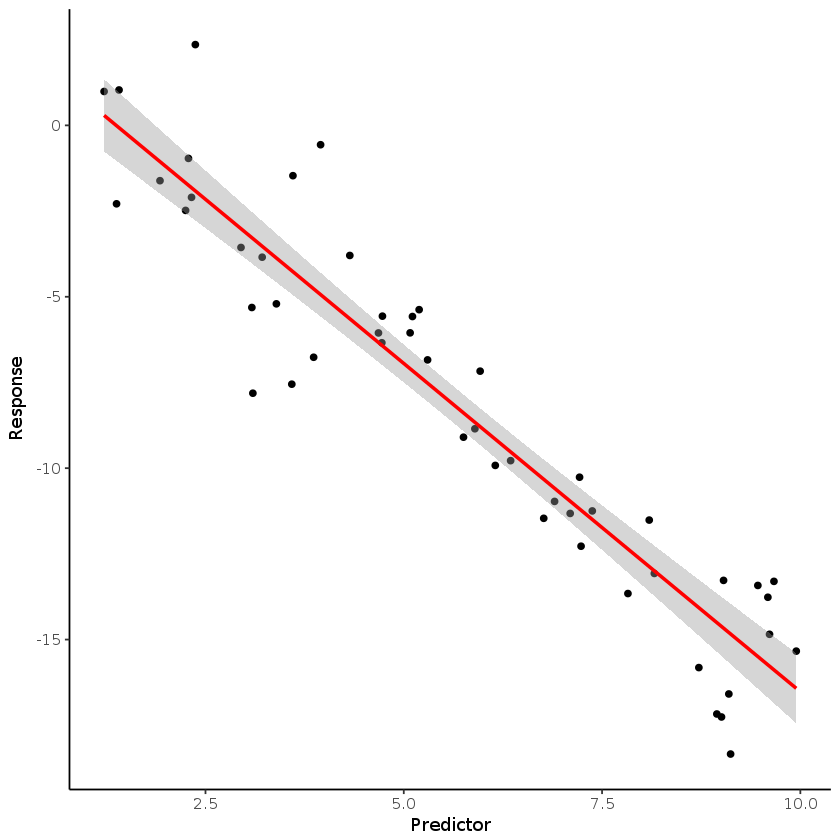

In [23]:
second_plot <- ggplot(data = df1, aes(y= response, x = V1)) 
second_plot + geom_point() + geom_smooth(method = "lm", se = TRUE, color="red") + theme_classic() + xlab("Predictor") + ylab("Response")

We made a scatterplot using geom_point. Then we added geom_smooth, used the classis theme, coloured the regression line red and named de x-axis Predictor and de y-axis Response.

# Assigment 2

# Packages

In [35]:
library(thematicmaps)
library(tidyverse)

## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [36]:
map_municipal <- read.csv2("../Sourcedata/nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

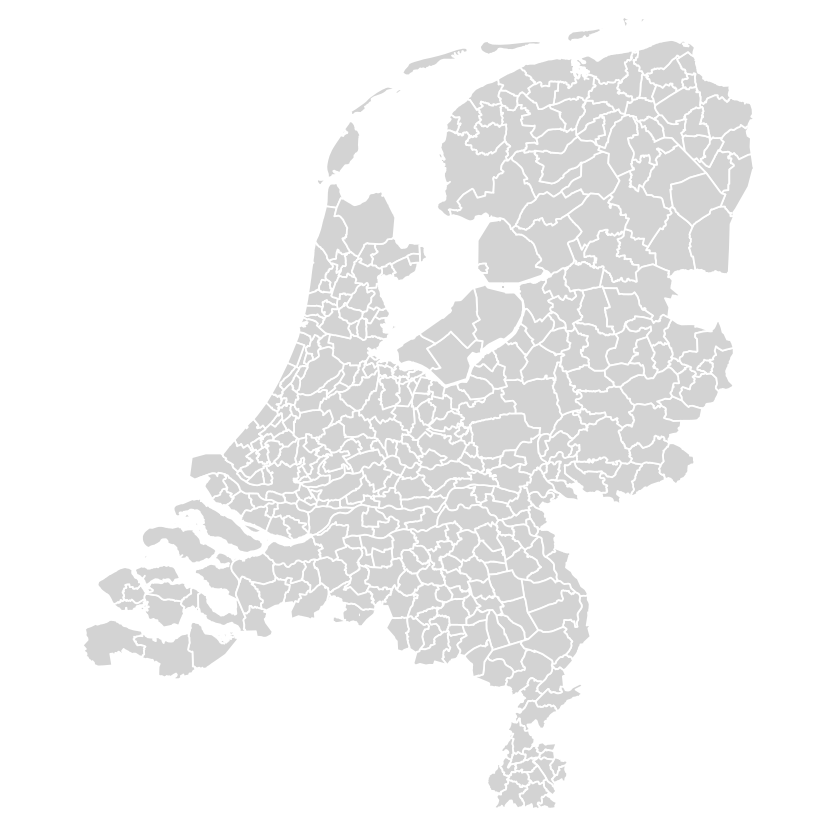

In [57]:
empty_map <- AddMapLayer(MapPlot(), map_municipal)
empty_map


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [58]:
pc4_locations <- read.csv2("../Sourcedata/nld_pc4_locations.csv")%>%
  mutate(X = as.numeric(as.character(X))) %>%
   mutate(Y = as.numeric(as.character(Y)))

str(pc4_locations)


'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


## Assignment 2d

### 2di

Read in the school data


In [59]:
schools <- read.csv2("../Sourcedata/schools.csv")


### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [60]:
schools1 <- schools %>%
    mutate(PC4 = substr(POSTCODE, 1, 4))

schools1 <- schools1[c('DENOMINATIE','PC4')]

### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [62]:
school_loc <- merge(pc4_locations, schools1, by = 'PC4',all = FALSE)
school_loc <- subset(school_loc, DENOMINATIE == "Rooms-Katholiek" | DENOMINATIE == "Protestants-Christelijk")
head(school_loc)

,PC4,X,Y,DENOMINATIE
31,1065,116701.2,485645.8,Protestants-Christelijk
37,1071,120223.0,485571.3,Rooms-Katholiek
50,1077,120152.7,484262.8,Protestants-Christelijk
53,1077,120152.7,484262.8,Rooms-Katholiek
57,1081,118277.6,482449.5,Protestants-Christelijk
80,1132,132947.2,501873.0,Rooms-Katholiek


With merge we merged two dataframs together. Then we made the subsets 'Protestants-Christlijk' and 'Rooms-Katholiek'. Later on we selected the rows we only want.

## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


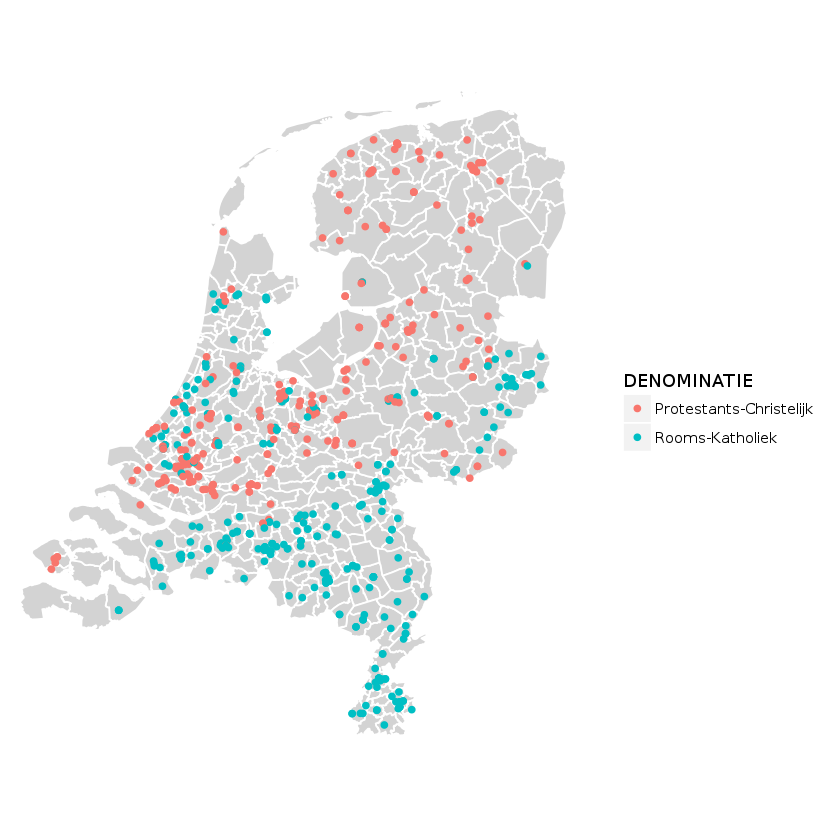

In [63]:
 empty_map %>%
  AddPointsLayer(school_loc, columnNameColor = "DENOMINATIE")

We added some Denominatie dots to the empty map we have made in 2b. We can conclude that the Bible Belt is quite a obvious in this map, the red dots 'Protestant-Christelijk' has shown this.

End of notebook